## Feature Engineering process

1. Processed Data
1. Feature Extraction & Engineering
1. Feature Scaling
1. Feature Selection
1. Features

## load libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as spstats
from sklearn.preprocessing import Binarizer, PolynomialFeatures

## Configure matplotlib

In [48]:
%matplotlib inline

mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6., 4.]
mpl.rcParams['figure.dpi'] = 100

## load data

In [49]:
df_poke = pd.read_csv('~/Downloads/data/pokemon.csv', encoding='utf-8')
df_poke.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [50]:
df_poke.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [51]:
df_poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [52]:
df_poke[['HP', 'Attack', 'Defense']].head()

,HP,Attack,Defense
0,45,49,49
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43


In [53]:
df_poke[['HP', 'Attack', 'Defense']].describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


## Binarization

Often raw numeric frequencies or counts are not necessary in building models especially with regard to methods applied in building recommender engines.

In this case, a binary feature is preferred as opposed to a count based feature.

In [54]:
df_songs = pd.read_excel('~/Downloads/data/songdata.xlsx')
df_songs.head()
bn = Binarizer(threshold=0.9)
df_songs['watched'] = bn.transform([df_songs['Views']])[0]

df_songs.head()

,Title,Time,Views,watched
0,Paris Ka Trip (Video) @Millind Gaba X @Yo Y...,2022-10-06 11:15:08,131724,1
1,Paris Ka Trip (Video) @Millind Gaba X @Yo Y...,2022-10-06 11:20:12,176267,1
2,Paris Ka Trip (Video) @Millind Gaba X @Yo Y...,2022-10-06 11:25:07,213041,1
3,Paris Ka Trip (Video) @Millind Gaba X @Yo Y...,2022-10-06 11:30:08,251581,1
4,Paris Ka Trip (Video) @Millind Gaba X @Yo Y...,2022-10-06 11:35:07,285265,1


In [55]:
df_pop = pd.read_csv('~/Downloads/data/news_final.csv', encoding='utf-8')
df_pop.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


## Interactions

A model is usually built in such a way that we try to model the output responses (discrete classes or continuous values) as a function of the input feature variables.

In this case, this simple linear model depicts the relationship between the output and inputs, purely based on the individual, separate input features.

However, often in several real-world datasets and scenarios, it makes sense to also try to capture the interactions between these feature variables as a part of the input feature set.

In [56]:
atk_def = df_poke[['Attack', 'Defense']]
atk_def.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [57]:
pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
result = pf.fit_transform(atk_def)

result

/Users/james/anaconda3/envs/T431/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/james/anaconda3/envs/T431/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/james/anaconda3/envs/T431/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/james/anaconda3/envs/T431/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       ...,
       [  110.,    60., 12100.,  6600.,  3600.],
       [  160.,    60., 25600.,  9600.,  3600.],
       [  110.,   120., 12100., 13200., 14400.]])

We can clearly see from this output that we have a total of five features including the new interaction features. We can see the degree of each feature in the matrix, using the following snippet.

In [58]:
pd.DataFrame(pf.powers_, columns=['Attack_degree', 'Defense_degree'])


,Attack_degree,Defense_degree
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


Now that we know what each feature actually represented from the degrees depicted, we can assign a name to each feature as follows to get the updated feature set.

In [59]:
intr_features = pd.DataFrame(result, 
                            columns=['Attack', 'Defense', 'Attack^2', 'Attack x Defense', 'Defense^2'])
intr_features

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0
...,...,...,...,...,...
795,100.0,150.0,10000.0,15000.0,22500.0
796,160.0,110.0,25600.0,17600.0,12100.0
797,110.0,60.0,12100.0,6600.0,3600.0
798,160.0,60.0,25600.0,9600.0,3600.0


## Binning

Often when working with numeric data, you might come across features or attributes which depict raw measures such as values or frequencies. In many cases, often the distributions of these attributes are skewed in the sense that some sets of values will occur a lot and some will be very rare. Besides that, there is also the added problem of varying range of these values.

There are various ways to engineer features from these raw values so we can address these issues. These methods include transformations, scaling and binning/quantization.

In [60]:
df_fcc_survey = pd.read_csv('~/Downloads/data/fcc_2016_coder_survey_subset.csv', encoding='utf-8')

df_fcc_survey.head()

/var/folders/51/6h8w2ly526vf0_7gb99cf46w0000gn/T/ipykernel_2767/3506365935.py:1: DtypeWarning: Columns (21,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fcc_survey = pd.read_csv('~/Downloads/data/fcc_2016_coder_survey_subset.csv', encoding='utf-8')


,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


### Fixed-Width Binning

In fixed-width binning, as the name indicates, we have specific fixed widths for each of the bins, which are usually pre-defined by the user analyzing the data. Each bin has a pre-fixed range of values which should be assigned to that bin on the basis of some business or custom logic, rules, or necessary transformations.

Text(0, 0.5, 'Frequency')

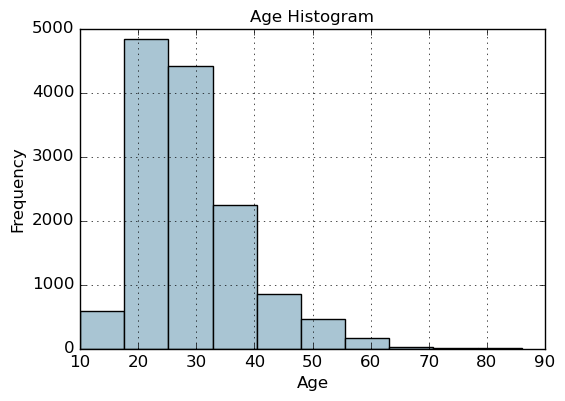

In [61]:
fig, ax = plt.subplots()
df_fcc_survey['Age'].hist(color='#A9C5D3')
ax.set_title('Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

Binning based on custom ranges is the answer to the all our questions about fixed-width binning

In [63]:
df_fcc_survey['Age_bin_round'] = np.array(np.floor(np.array(df_fcc_survey['Age']) / 10.))

bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]
df_fcc_survey['Age_bin_custom_range'] = pd.cut(np.array(df_fcc_survey['Age']),
                                    bins=bin_ranges)
df_fcc_survey['Age_bin_custom_label'] = pd.cut(np.array(df_fcc_survey['Age']),
                                    bins=bin_ranges, labels=bin_names)
df_fcc_survey[['Age', 'Age_bin_round', 'Age_bin_custom_range',
                        'Age_bin_custom_label']].iloc[2:10]


,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
2,19.0,1.0,"(15, 30]",2
3,26.0,2.0,"(15, 30]",2
4,20.0,2.0,"(15, 30]",2
5,34.0,3.0,"(30, 45]",3
6,23.0,2.0,"(15, 30]",2
7,35.0,3.0,"(30, 45]",3
8,33.0,3.0,"(30, 45]",3
9,33.0,3.0,"(30, 45]",3


## Adaptive Binning

Some of the bins might be densely populated and some of them might be sparsely populated or even be empty! Adaptive binning is a safer and better approach where we use the data distribution itself to decide what should be the appropriate bins.

Quantile based binning is a good strategy to use for adaptive binning. Quantiles are specific values or cut-points which help in partitioning the continuous valued distribution of a specific numeric field into discrete contiguous bins or intervals

In [66]:
df_fcc_survey[['Age', 'Income']].iloc[4:9]

,Age,Income
4,20.0,6000.0
5,34.0,40000.0
6,23.0,32000.0
7,35.0,40000.0
8,33.0,80000.0


Text(0, 0.5, 'Frequency')

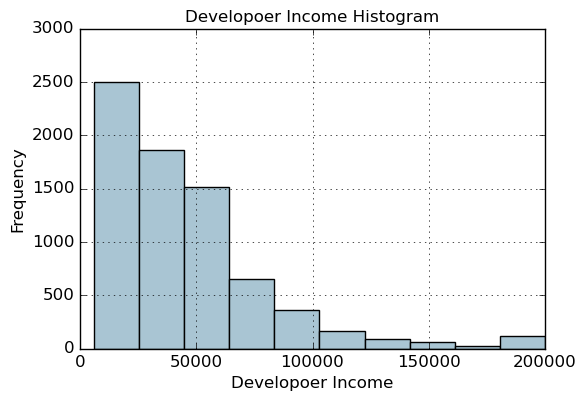

In [70]:
fig, ax = plt.subplots()
df_fcc_survey['Income'].hist(bins=30, color='#A9C5D3')
ax.set_title('Developoer Income Histogram', fontsize=12)
ax.set_xlabel('Developoer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

Let’s take a 4-Quantile or a quartile based adaptive binning scheme.

In [71]:
quantile_list = [0., .25, .5, .75, 1.]
quantiles = df_fcc_survey['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

Text(0, 0.5, 'Frequency')

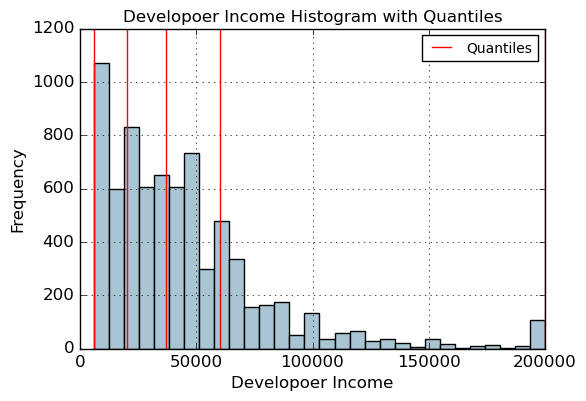

In [72]:
fig, ax = plt.subplots()
df_fcc_survey['Income'].hist(bins=30, color='#A9C5D3')

for q in quantiles:
    qvl = plt.axvline(q, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Developoer Income Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Developoer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)


In [73]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
df_fcc_survey['Income_quantile_range'] = pd.qcut(df_fcc_survey['Income'],
                                                q=quantile_list)
df_fcc_survey['Income_quantile_label'] = pd.qcut(df_fcc_survey['Income'],
                                                q=quantile_list,
                                                labels=quantile_labels)
df_fcc_survey[['Age', 'Income', 'Income_quantile_range', 'Income_quantile_label']].iloc[4:9]

,Age,Income,Income_quantile_range,Income_quantile_label
4,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


## Log Transform

The log transform belongs to the power transform family of functions. _(natural log)_

In [74]:
df_fcc_survey['Income_log'] = np.log((1 + df_fcc_survey['Income']))
df_fcc_survey[['Age', 'Income', 'Income_log']].iloc[4:9]

,Age,Income,Income_log
4,20.0,6000.0,8.699681
5,34.0,40000.0,10.596660
6,23.0,32000.0,10.373522
7,35.0,40000.0,10.596660
8,33.0,80000.0,11.289794


Text(11.5, 450, '$\\mu$=10.43')

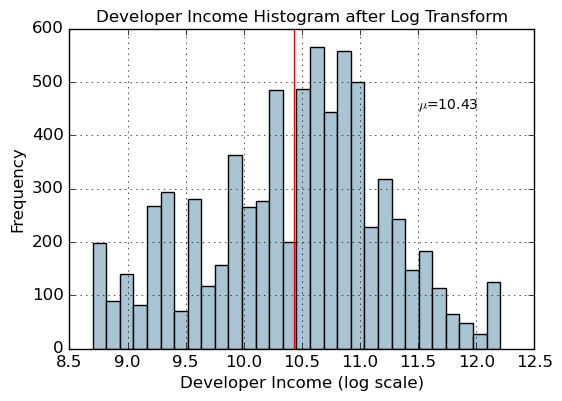

In [79]:
income_log_mean = np.round(np.mean(df_fcc_survey['Income_log']), 2)
fig, ax = plt.subplots()
df_fcc_survey['Income_log'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

## Box-Cox Transform

Box-Cox transform, another popular function belonging to the power transform family of functions. This function has a prerequisite that the numeric values to be transformed must be positive (similar to what log transform expects).

In [80]:
# get optimal lambda value from non null income values
income = np.array(df_fcc_survey['Income'])
income_clean = income[~np.isnan(income)]
l, opt_lambda = spstats.boxcox(income_clean)
print('Optimal lambda value:', opt_lambda)

Optimal lambda value: 0.11799122497648248


In [81]:
df_fcc_survey['Income_boxcox_lambda_0'] = spstats.boxcox((1+df_fcc_survey['Income']), lmbda=0)
df_fcc_survey['Income_boxcox_lambda_opt'] = spstats.boxcox(df_fcc_survey['Income'], lmbda=opt_lambda)
df_fcc_survey[['Age', 'Income', 'Income_log',
                'Income_boxcox_lambda_0', 'Income_boxcox_lambda_opt']].iloc[4:9]

,Age,Income,Income_log,Income_boxcox_lambda_0,Income_boxcox_lambda_opt
4,20.0,6000.0,8.699681,8.699681,15.180667
5,34.0,40000.0,10.596660,10.596660,21.115340
6,23.0,32000.0,10.373522,10.373522,20.346418
7,35.0,40000.0,10.596660,10.596660,21.115340
8,33.0,80000.0,11.289794,11.289794,23.637128


Text(24, 450, '$\\mu$=20.65')

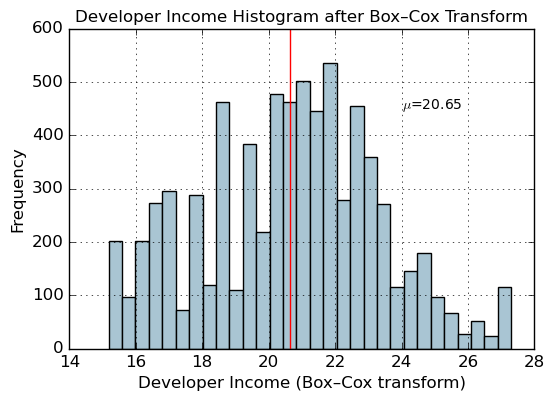

In [82]:
income_boxcox_mean = np.round(np.mean(df_fcc_survey['Income_boxcox_lambda_opt']), 2)
fig, ax = plt.subplots()
df_fcc_survey['Income_boxcox_lambda_opt'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_boxcox_mean, color='r')
ax.set_title('Developer Income Histogram after Box–Cox Transform', fontsize=12)
ax.set_xlabel('Developer Income (Box–Cox transform)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(24, 450, r'$\mu$='+str(income_boxcox_mean), fontsize=10)